In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "C:\\datasets\\spe\\World Bank Carbon Pricing.xlsx"

In [10]:
compliance_info_df = pd.read_excel(path, sheet_name="Compliance_Gen Info", skiprows=1)
compliance_emissions_df = pd.read_excel(path, sheet_name="Compliance_Emissions", skiprows=1)
compliance_revenue_df = pd.read_excel(path, sheet_name="Compliance_Revenue", skiprows=1)
compliance_price_df = pd.read_excel(path, sheet_name="Compliance_Price", skiprows=1)
crediting_detail_df = pd.read_excel(path, sheet_name="Crediting_Detail", skiprows=1)
crediting_issuance_df = pd.read_excel(path, sheet_name="Crediting_Issuance", skiprows=1)
cooperative_approach_df = pd.read_excel(path, sheet_name="Cooperative Approaches", skiprows=1)

In [11]:
# i want to create a final column as final price, where it has the latest price from the available prices in the years columns
compliance_price_df["Final Price"] = compliance_price_df.iloc[:, 2:].apply(lambda x: x.dropna().iloc[-1], axis=1)
# drop rows with - in the final price
compliance_price_df = compliance_price_df[compliance_price_df["Final Price"] != "-"]
# replace any cell with - with NaN
compliance_price_df.replace("-", np.nan, inplace=True)
# convert the type of the year columns to float
compliance_price_df.iloc[:, 8:] = compliance_price_df.iloc[:, 8:].astype(float)
cp_df = compliance_price_df[["Name of the initiative", "Instrument Type", "Jurisdiction Covered", "Region", "Income group", "Final Price"]]


C:\Users\sinaz\AppData\Local\Temp\ipykernel_14316\1096179724.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  compliance_price_df.replace("-", np.nan, inplace=True)


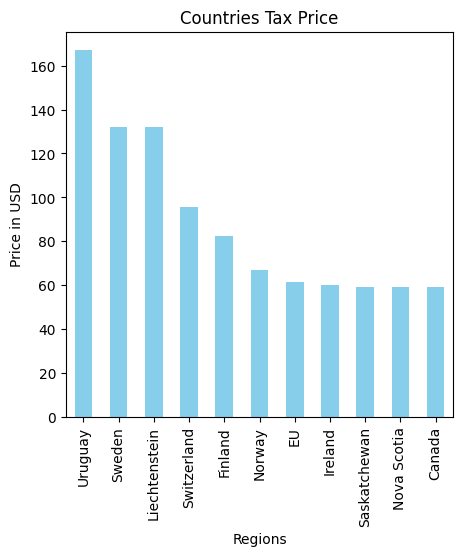

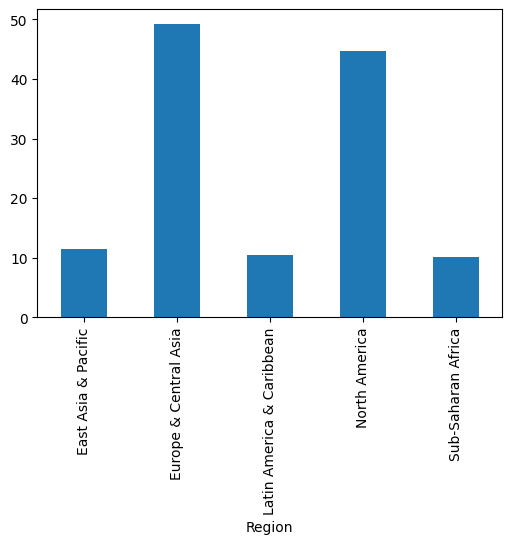

In [16]:
# drop with Nova Scotia value if the Jurisdiction Covered is Nova Scotia
cp_df = cp_df[~((cp_df["Jurisdiction Covered"] == "Nova Scotia") & (cp_df["Name of the initiative"] == "California") & (cp_df["Instrument Type"] == "Carbon tax"))]
grouped_by_jurisdiction = cp_df.groupby("Jurisdiction Covered")["Final Price"].mean().sort_values(ascending=False)[:11].plot(kind="bar", figsize=(5, 5), color='skyblue')
plt.title("Countries Tax Price")
plt.xlabel("Regions")
plt.ylabel("Price in USD")
plt.savefig("Countries Tax Price")
plt.show()

grouped_by_region = cp_df.groupby("Region")["Final Price"].mean().plot(kind="bar", figsize=(6, 4))